In [63]:
#https://towardsdatascience.com/creating-beautiful-river-maps-with-python-37c9b5f5b74c
os.chdir('C:\\Users\\iande\\Downloads\\python-maps')

import geopandas as gpd

sam_rivers = gpd.read_file("sarivs.shp")

print(sam_rivers)

           cat   a_cat  a_ARCID  a_UP_CELLS   a_AREA  a_WIDTH  a_WIDTH5  \
0            1       1        1         299    62.19    16.38      5.72   
1            2       2        2         135    28.20    11.08      3.93   
2            3       3        3         197    41.26    13.37      4.71   
3            4       4        4         183    38.16    12.87      4.54   
4            5       5        5         130    27.17    10.88      3.86   
...        ...     ...      ...         ...      ...      ...       ...   
465495  465496  459916   459916         271  1212.46    26.88      9.21   
465496  465497  460747   460747        2610   391.41    15.65      5.48   
465497  465498  462741   462741         967   229.88    12.14      4.29   
465498  465499  464090   464090         328   104.52     8.32      2.99   
465499  465500  464215   464215         249    62.29     6.50      2.36   

        a_WIDTH95  a_DEPTH  a_DEPTH5  a_DEPTH95  b_cat  b_value b_label  \
0           47.48     0.

In [64]:
lakes = gpd.read_file("10m_physical/ne_10m_lakes.shp")
country_shapefiles = gpd.read_file("10m_cultural/ne_10m_admin_0_countries.shp")
sam = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'South America']
sam_lakes = gpd.sjoin(lakes, sam, op='intersects')
sam_lakes = lakes.loc[lakes.index.isin(sam_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(sam_rivers, sam_lakes, op='within')
sam_rivers = sam_rivers.loc[~sam_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\iande\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\iande\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


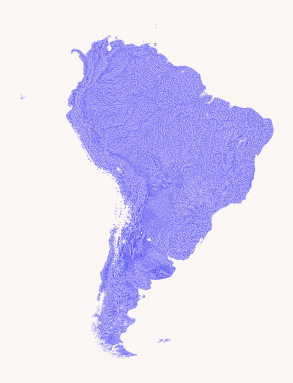

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

sam_rivers.plot(ax=ax, color='blue', lw=0.1)
sam_lakes.plot(ax=ax, color='#FCF6F5FF', alpha=1)

ax.axis('off')

plt.show()

In [66]:
'''
lake_titicaca = sam_lakes.loc[sam_lakes['name'] == 'Lago Titicaca']
funny_features = gpd.sjoin(sam_rivers, lake_titicaca, op='within')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

lake_titicaca.plot(ax=ax, color='black', alpha=0.1)
funny_features.plot(ax=ax, color='blue', lw=0.4, alpha=1)

ax.axis('off')

plt.show()
'''

"\nlake_titicaca = sam_lakes.loc[sam_lakes['name'] == 'Lago Titicaca']\nfunny_features = gpd.sjoin(sam_rivers, lake_titicaca, op='within')\n\nfig, ax = plt.subplots(facecolor='#FCF6F5FF')\nfig.set_size_inches(5, 7)\n\nlake_titicaca.plot(ax=ax, color='black', alpha=0.1)\nfunny_features.plot(ax=ax, color='blue', lw=0.4, alpha=1)\n\nax.axis('off')\n\nplt.show()\n"

In [67]:
basins = gpd.read_file("hydrobasins/hydrobasins_southam.shp") #from https://data.apps.fao.org/map/catalog/static/api/records/d47ba28e-31be-470d-81cf-ad3d5594fafd
print(basins)

      SUB_BAS  TO_BAS  MAJ_BAS                    MAJ_NAME  \
0        1003    -999     3001             Caribbean Coast   
1        1004    1003     3001             Caribbean Coast   
2        1005    1003     3001             Caribbean Coast   
3        1006    -999     3001             Caribbean Coast   
4        1007    -999     3001             Caribbean Coast   
...       ...     ...      ...                         ...   
1356    21116    -999     3021  South Chile, Pacific Coast   
1357    21116    -999     3021  South Chile, Pacific Coast   
1358    21116    -999     3021  South Chile, Pacific Coast   
1359    21116    -999     3021  South Chile, Pacific Coast   
1360    21116    -999     3021  South Chile, Pacific Coast   

                    SUB_NAME  SUB_AREA  MAJ_AREA  LEGEND  \
0                  Altrato 1      5787    317043       1   
1                      Sucio      4933    317043       1   
2                  Altrato 2     25125    317043       1   
3     Golfo del

In [68]:
import pandas as pd

colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482', '#F3C300',  'blue', '#F38400',
                  '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280',
                  '#F6A600', '#882D17', '#E25822', '#8DB600', '#F99379',  
                  '#DCD300', '#F3C300', '#E68FAC', '#C2B280', '#222222']

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

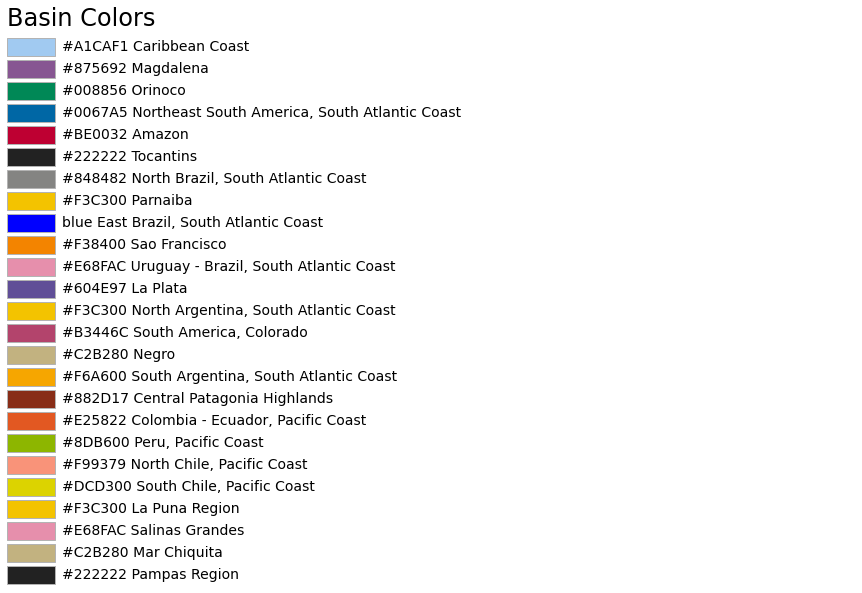

In [69]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAJ_NAME.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )
plt.show()

C:\Users\iande\miniconda3\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


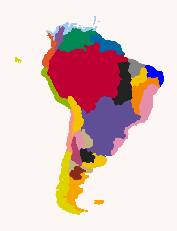

In [70]:
basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

fig, ax = plt.subplots()
basins.plot(ax=ax, column='MAJ_NAME', color=basins['colors'])
ax.axis('off')
plt.show()

In [71]:
rivers_basins = gpd.sjoin(sam_rivers, basins, 'inner')

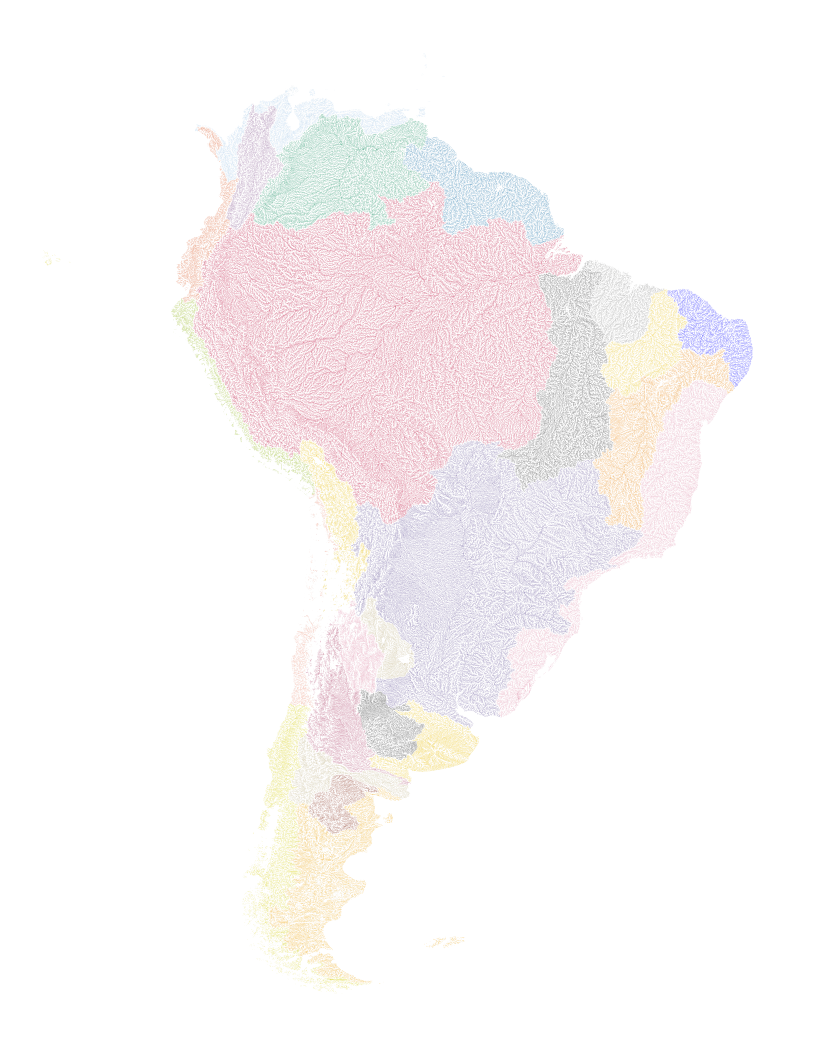

In [97]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(14, 28)

rivers_basins.plot(ax=ax, edgecolor = 'face', color=rivers_basins['colors'], lw=0.1)
#sam_lakes.plot(ax=ax)

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.axis('off')
txt = ax.text(0.02, 0.03, "",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.savefig('sam_rivers.png', bbox_inches='tight')
plt.show()

In [77]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = 0.6 - 0.005
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = 0.005 + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'a_AREA', min_value=0.005, max_value=0.6)
rivers_basins = scale_lw(rivers_basins, 'a_WIDTH', min_value=0.005, max_value=0.6)
rivers_basins = scale_lw(rivers_basins, 'a_DEPTH', min_value=0.005, max_value=0.6)

In [ ]:
import matplotlib.pyplot as plt
'''
fig = plt.figure()
fig.set_size_inches(15, 7)

ax1 = plt.subplot(1,3,1)
rivers_basins.plot(ax=ax1, color='blue', lw=rivers_basins['LW_a_AREA'])
sam_lakes.plot(ax=ax1)
ax1.set_title("Discharge", fontfamily='fantasy')
ax1.axis('off')

ax2 = plt.subplot(1,3,2)
rivers_basins.plot(ax=ax2, color='blue', lw=rivers_basins['LW_a_WIDTH'])
sam_lakes.plot(ax=ax2)
ax2.set_title("Width", fontfamily='fantasy')
ax2.axis('off')

ax3 = plt.subplot(1,3,3)
rivers_basins.plot(ax=ax3, color='blue', lw=rivers_basins['LW_a_DEPTH'])
sam_lakes.plot(ax=ax3)
ax3.set_title("Depth", fontfamily='fantasy')
ax3.axis('off')

plt.show()
'''

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5, 7)

rivers_basins.plot(ax=ax, color='blue', lw=rivers_basins['LW_a_DEPTH'])
sam_lakes.plot(ax=ax)

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.axis('off')
txt = ax.text(0.02, 0.03, "",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='gainsboro')
fig.set_size_inches(14, 28)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_a_DEPTH'])
sam_lakes.plot(ax=ax)

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.axis('off')
txt = ax.text(0.02, 0.03, "",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

#ax.legend(rivers_basins.MAJ_NAME)

ax.axis('off')
plt.savefig('sam_rivers_width.png', bbox_inches='tight')
plt.show()